In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
#Question A
#Part 1
def calltree_numpy(S0, K, T, r, sigma, q, N):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :return: C: float
        The price of the call option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S) 
    C[:, N] = np.maximum(0, S[:, N]-K) 
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
    return  C[0, 0]
calltree_numpy(10, 12, 3/12, 0.03, 0.25, 0.01, 500)

0.04787683379013834

In [4]:
def chooser(S0, K, T, r, sigma, q, N, M):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :param M: int
            The period in which the choice is exercised (<=N)
    :return: CH: float
        The price of the chooser option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S)
    C[:, N] = np.maximum(0, S[:, N]-K) 
    P[:, N] = np.maximum(0, K-S[:, N])  
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
    for j in range(N-1, -1, -1):
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]    
    CH = np.zeros((M+1, M+1))
    CH[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    for j in range(M-1, -1, -1):
        CH[:j+1, j] = piu * CH[:j+1, j+1] + pid * CH[1:j+2, j+1]  
    return CH[0, 0]
chooser(10, 12, 3/12, 0.03, 0.25, 0.01, 500, 250)

1.9911270877212766

In [5]:
def chooser_american(S0, K, T, r, sigma, q, N, M):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :param M: int
            The period in which the choice is exercised (<=N)
    :return: CHA: float
        The price of the american chooser option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S)
    C[:, N] = np.maximum(0, S[:, N]-K) 
    P[:, N] = np.maximum(0, K-S[:, N])  
    for j in range(N-1, M-1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
        C[:j+1, j] = np.maximum(C[:j+1, j], S[:j+1, j]-K )
    for j in range(N-1, -1, -1):
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]
        P[:j+1, j] = np.maximum(P[:j+1, j], K-S[:j+1, j] )
    CHA = np.zeros((M+1, M+1))
    CHA[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    for j in range(M-1, -1, -1):
        CHA[:j+1, j] = piu * CHA[:j+1, j+1] + pid * CHA[1:j+2, j+1]  
    return CHA[0, 0]
chooser_american(10, 12, 3/12, 0.03, 0.25, 0.01, 500, 250)

2.0133898108186448

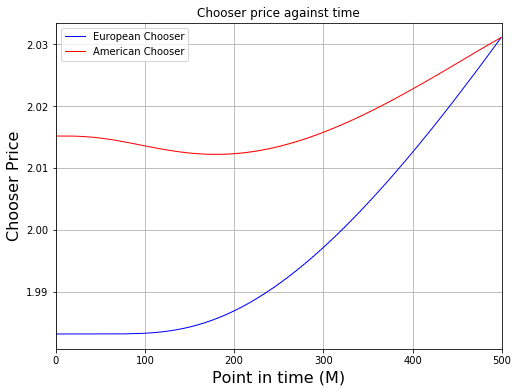

In [6]:
# Graphing the behaviour of the American and the European chooser

matrixEU=np.zeros(500)
matrixAM=np.zeros(500)
x=range(0,500)
for i in range(1,501):
    matrixAM[i-1]=chooser_american(10, 12, 3/12, 0.03, 0.25, 0.01, 500, i)
    matrixEU[i-1]=chooser(10, 12, 3/12, 0.03, 0.25, 0.01, 500, i)

plt.figure(figsize=(8,6))
plt.plot(x, matrixEU, "blue", label="European Chooser", linewidth=1)
plt.plot(x, matrixAM, "red", label="American Chooser", linewidth=1)
plt.grid(True)
plt.xlabel("Point in time (M)", size=16)
plt.ylabel("Chooser Price", size=16)
plt.xlim(0,500)
plt.title("Chooser price against time")
plt.legend()
plt.show()

From the graph we can see that the American chooser option first has a higher price than the European chooser option.
This could be attributed to the American chooser giving its holder more flexibility as it could be exercised during the
whole holding period and the European option could be exercised only at maturity. As a result, the American chooser is
more flexible which warrants the higher price on it.
As M approaches N the American option becomes increasingly more similar to the European option, because the periods in
which the holder can exercise decrease. Therefore, the flexibility of the American chooser decreases and its price 
becomes closer to that of the European chooser. At M=N the American option has the same payoff as the European one 
and both options can only be exercised at a point in time M=N, thus they have the same price.


In [7]:

# Input parameters
S0=12; R=0.03; T=10; sigma=0.25; numsim=10000; mu=0; q=0.01; K=S0*(1+R)**T; r=np.log(1+R)
# Fixing the random seed for the sake of reproducibility
np.random.seed(0) #random seed of 0


def bmsim_vec(T, N, mu, sigma, numsim):  
    deltaT = float(T)/N
    z = np.random.randn(numsim, N+1)  
    dX = mu*deltaT + sigma*np.sqrt(deltaT)*z
    dX[:, 0] = 0.   
    return dX


def certificatemc(S0, R, T, sigma, q, numsim):
    """
    Calculates the no arbitrage price of an index linked certificate
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param R: float
        The annual compounding rate
    :param T: int
        Expiry time of the option
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param numsim: 
    :return: 
    """
    mu=np.log(1+R)-q-0.5*sigma**2
    N=T
    dX=bmsim_vec(T, N, mu, sigma, numsim)
    rf=np.full((numsim, T+1), np.log(1+R))
    ratemax=np.maximum(dX[:,1:], rf[:,1:])
    payoffs=np.exp(np.log(S0)+ratemax.sum(axis=1))
    v=np.exp(-np.log(1+R)*T)*payoffs
    X0=v.mean()
    s=v.std()
    zq=norm.ppf(0.975) #0.975 because of the two-tailed distribution
    Xl=X0-zq/np.sqrt(numsim)*s
    Xu=X0+zq/np.sqrt(numsim)*s
    print("X0 estimate: "+ str(X0) + '\nThe 95% confidence interval for X0 is: ['+str(Xl)+';'+str(Xu)+']')

certificatemc(S0, R, T, sigma, q, numsim)

X0 estimate: 29.497346110034094
The 95% confidence interval for X0 is: [29.209885142981978;29.78480707708621]


In [8]:
# Construct a replicating portfolio
def blackscholes(S0, K, T, r, sigma):
    d1 = (np.log(S0)-np.log(K)+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return np.exp(-q*T)*S0*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2) 

def rep(S0, K, T, r, sigma, q):
    c=blackscholes(S0, K, T, r, sigma)
    bond=S0
    return c+bond
print("The price of the replicating portfolio is:")
rep(S0, K, T, r, sigma, q)

The price of the replicating portfolio is:


14.968538550931294

In [9]:
def F0(S0, T, r, sigma,q):
    d1 = ((-q+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S0*(1+np.exp(-q*T)*(norm.cdf(d1)))- S0*norm.cdf(d2)
print("The price of the derivative is:")
F0(S0, T, r, sigma,q)

The price of the derivative is:


14.968538550931294

In [ ]:
def F0(S0, T, r, sigma,q):
    d1 = ((-q+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S0*(1+np.exp(-q*T)*(norm.cdf(d1)))- S0*norm.cdf(d2)
print("The price of the derivative is:")
F0(S0, T, r, sigma,q)


In [1]:
#Question A
#Part 1
def calltree_numpy(S0, K, T, r, sigma, q, N):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :return: C: float
        The price of the call option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S) 
    C[:, N] = np.maximum(0, S[:, N]-K) 
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
    return  C[0, 0]
calltree_numpy(10, 12, 3/12, 0.03, 0.25, 0.01, 500)

0.04787683379013834

In [ ]:
def chooser(S0, K, T, r, sigma, q, N, M):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :param M: int
            The period in which the choice is exercised (<=N)
    :return: CH: float
        The price of the chooser option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S)
    C[:, N] = np.maximum(0, S[:, N]-K) 
    P[:, N] = np.maximum(0, K-S[:, N])  
    for j in range(N-1, -1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
    for j in range(N-1, -1, -1):
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]    
    CH = np.zeros((M+1, M+1))
    CH[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    for j in range(M-1, -1, -1):
        CH[:j+1, j] = piu * CH[:j+1, j+1] + pid * CH[1:j+2, j+1]  
    return CH[0, 0]
chooser(10, 12, 3/12, 0.03, 0.25, 0.01, 500, 250)

In [ ]:
def chooser_american(S0, K, T, r, sigma, q, N, M):
    """
    Calculates the price of a call option based on input parameters
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param K: float
        The strike price of the option
    :param T: float
        Expiry time of the option
    :param r: float
        The annualized risk free interest rate
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param N: int
        Number of periods
    :param M: int
            The period in which the choice is exercised (<=N)
    :return: CHA: float
        The price of the american chooser option
    """
    deltaT = T / float(N)
    u = np.exp(sigma*np.sqrt(deltaT))
    d = 1.0 / u
    p = (np.exp((r-q)*deltaT)-d) / (u-d)
    piu = np.exp(-r*deltaT) * p
    pid = np.exp(-r*deltaT) * (1-p)
    C = np.zeros((N+1, N+1))
    P = np.zeros((N+1, N+1))
    S = S0 * u**np.arange(N+1) * d**(2*np.arange(N+1)[:, np.newaxis])
    S = np.triu(S)
    C[:, N] = np.maximum(0, S[:, N]-K) 
    P[:, N] = np.maximum(0, K-S[:, N])  
    for j in range(N-1, M-1, -1):
        C[:j+1, j] = piu * C[:j+1, j+1] + pid * C[1:j+2, j+1]
        C[:j+1, j] = np.maximum(C[:j+1, j], S[:j+1, j]-K )
    for j in range(N-1, -1, -1):
        P[:j+1, j] = piu * P[:j+1, j+1] + pid * P[1:j+2, j+1]
        P[:j+1, j] = np.maximum(P[:j+1, j], K-S[:j+1, j] )
    CHA = np.zeros((M+1, M+1))
    CHA[:, M] = np.maximum(C[:M+1, M], P[:M+1, M])
    for j in range(M-1, -1, -1):
        CHA[:j+1, j] = piu * CHA[:j+1, j+1] + pid * CHA[1:j+2, j+1]  
    return CHA[0, 0]
chooser_american(10, 12, 3/12, 0.03, 0.25, 0.01, 500, 250)

In [ ]:
# Graphing the behaviour of the American and the European chooser

matrixEU=np.zeros(500)
matrixAM=np.zeros(500)
x=range(0,500)
for i in range(1,501):
    matrixAM[i-1]=chooser_american(10, 12, 3/12, 0.03, 0.25, 0.01, 500, i)
    matrixEU[i-1]=chooser(10, 12, 3/12, 0.03, 0.25, 0.01, 500, i)

plt.figure(figsize=(8,6))
plt.plot(x, matrixEU, "blue", label="European Chooser", linewidth=1)
plt.plot(x, matrixAM, "red", label="American Chooser", linewidth=1)
plt.grid(True)
plt.xlabel("Point in time (M)", size=16)
plt.ylabel("Chooser Price", size=16)
plt.xlim(0,500)
plt.title("Chooser price against time")
plt.legend()
plt.show()

From the graph we can see that the American chooser option first has a higher price than the European chooser option.
This could be attributed to the American chooser giving its holder more flexibility as it could be exercised during the
whole holding period and the European option could be exercised only at maturity. As a result, the American chooser is
more flexible which warrants the higher price on it.
As M approaches N the American option becomes increasingly more similar to the European option, because the periods in
which the holder can exercise decrease. Therefore, the flexibility of the American chooser decreases and its price 
becomes closer to that of the European chooser. At M=N the American option has the same payoff as the European one 
and both options can only be exercised at a point in time M=N, thus they have the same price.


In [ ]:

# Input parameters
S0=12; R=0.03; T=10; sigma=0.25; numsim=10000; mu=0; q=0.01; K=S0*(1+R)**T; r=np.log(1+R)
# Fixing the random seed for the sake of reproducibility
np.random.seed(0) #random seed of 0


def bmsim_vec(T, N, mu, sigma, numsim):  
    deltaT = float(T)/N
    z = np.random.randn(numsim, N+1)  
    dX = mu*deltaT + sigma*np.sqrt(deltaT)*z
    dX[:, 0] = 0.   
    return dX


def certificatemc(S0, R, T, sigma, q, numsim):
    """
    Calculates the no arbitrage price of an index linked certificate
    
    :param S0: float
        The price of the underlying asset at the initial moment
    :param R: float
        The annual compounding rate
    :param T: int
        Expiry time of the option
    :param sigma: float
        The standard deviation of the stock's returns
    :param q: float
        The dividend yield of the underlying stock
    :param numsim: 
    :return: 
    """
    mu=np.log(1+R)-q-0.5*sigma**2
    N=T
    dX=bmsim_vec(T, N, mu, sigma, numsim)
    rf=np.full((numsim, T+1), np.log(1+R))
    ratemax=np.maximum(dX[:,1:], rf[:,1:])
    payoffs=np.exp(np.log(S0)+ratemax.sum(axis=1))
    v=np.exp(-np.log(1+R)*T)*payoffs
    X0=v.mean()
    s=v.std()
    zq=norm.ppf(0.975) #0.975 because of the two-tailed distribution
    Xl=X0-zq/np.sqrt(numsim)*s
    Xu=X0+zq/np.sqrt(numsim)*s
    print("X0 estimate: "+ str(X0) + '\nThe 95% confidence interval for X0 is: ['+str(Xl)+';'+str(Xu)+']')

certificatemc(S0, R, T, sigma, q, numsim)

In [ ]:
# Construct a replicating portfolio
def blackscholes(S0, K, T, r, sigma):
    d1 = (np.log(S0)-np.log(K)+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return np.exp(-q*T)*S0*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2) 

def rep(S0, K, T, r, sigma, q):
    c=blackscholes(S0, K, T, r, sigma)
    bond=S0
    return c+bond
print("The price of the replicating portfolio is:")
rep(S0, K, T, r, sigma, q)

In [ ]:
def F0(S0, T, r, sigma,q):
    d1 = ((-q+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S0*(1+np.exp(-q*T)*(norm.cdf(d1)))- S0*norm.cdf(d2)
print("The price of the derivative is:")
F0(S0, T, r, sigma,q)
